In [1]:
%%time
from datetime import datetime
a = datetime.now()

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("afmhot")
# sns.set_palette("twilight")
# sns.set_style("darkgrid",{"axes.facebolor":"0.90"})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":1.5})
sns.set_style("whitegrid")
import pylab
pylab.rcParams['figure.figsize'] = (15, 8)
plt.style.use('dark_background')


import tensorflow as tf
print("# GPUs: ", len(tf.config.experimental.list_physical_devices("GPU")))
import numpy as np
import tensorflow.keras as tfk
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
data=tfk.datasets.mnist.load_data()

train_images = data[0][0]
train_labels = data[0][1]

test_images = data[1][0]
test_labels = data[1][1]

# Scale the data ~ B&W /255.
train_images = train_images/255.000
test_images = test_images/255.0000

# Model


# GPUs:  1
CPU times: total: 7.06 s
Wall time: 8.29 s


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(0,)'),
  Text(1, 0, '(1,)'),
  Text(2, 0, '(2,)'),
  Text(3, 0, '(3,)'),
  Text(4, 0, '(4,)'),
  Text(5, 0, '(5,)'),
  Text(6, 0, '(6,)'),
  Text(7, 0, '(7,)'),
  Text(8, 0, '(8,)'),
  Text(9, 0, '(9,)')])

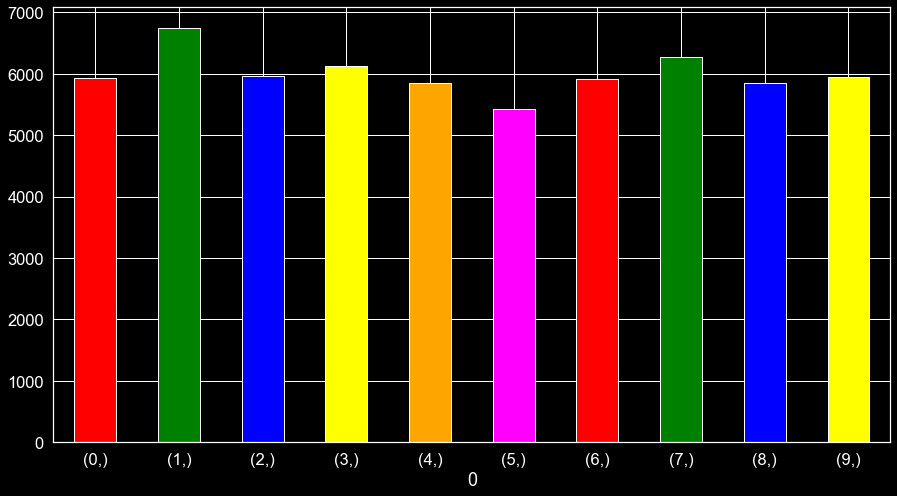

In [57]:
pd.DataFrame(train_labels).value_counts().sort_index().plot(kind='bar',color=['r','green','blue','yellow','orange','magenta'])
plt.xticks(rotation=360)

In [26]:
len(pd.DataFrame(test_labels).value_counts())

10

In [44]:
2**8

256

In [27]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(2**8, activation='relu'))


model.add(Dense(10))

In [28]:
model.layers

In [29]:
model.compile(optimizer='adam', 
              loss=tfk.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
len(train_labels)

60000

In [31]:
%%time
model.fit(train_images,train_labels, epochs = 20,validation_data=(test_images, test_labels),verbose=5)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1929 - accuracy: 0.9423 - val_loss: 0.0958 - val_accuracy: 0.9728
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0767 - accuracy: 0.9759 - val_loss: 0.0728 - val_accuracy: 0.9769
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0495 - accuracy: 0.9840 - val_loss: 0.0740 - val_accuracy: 0.9775
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0358 - accuracy: 0.9878 - val_loss: 0.0708 - val_accuracy: 0.9777
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0257 - accuracy: 0.9916 - val_loss: 0.0729 - val_accuracy: 0.9801
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0199 - accuracy: 0.9935 - val_loss: 0.0928 - val_accuracy: 0.9777
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0177 - accuracy: 0.9938 - val_loss: 0.0780 - val_accuracy:

In [66]:
hist['accuracy']

[0.9422666430473328,
 0.9758999943733215,
 0.9839500188827515,
 0.9878333210945129,
 0.991599977016449,
 0.9934666752815247,
 0.9937833547592163,
 0.9956333041191101,
 0.9960833191871643,
 0.9961000084877014,
 0.9965999722480774,
 0.9971666932106018,
 0.9967333078384399,
 0.9970999956130981,
 0.9973333477973938,
 0.9972000122070312,
 0.9980499744415283,
 0.9974499940872192,
 0.9980000257492065,
 0.9980166554450989]

In [32]:
hist=model.history.history

In [33]:
model.history.history


{'loss': [0.1928737759590149,
  0.07674186676740646,
  0.04950800910592079,
  0.035755228251218796,
  0.025662090629339218,
  0.019912153482437134,
  0.0176980160176754,
  0.014143687672913074,
  0.01218952052295208,
  0.01162424311041832,
  0.010488776490092278,
  0.008511084131896496,
  0.009813191369175911,
  0.009079327806830406,
  0.008617390878498554,
  0.009007911197841167,
  0.006512869615107775,
  0.00781747605651617,
  0.007022508420050144,
  0.006912531331181526],
 'accuracy': [0.9422666430473328,
  0.9758999943733215,
  0.9839500188827515,
  0.9878333210945129,
  0.991599977016449,
  0.9934666752815247,
  0.9937833547592163,
  0.9956333041191101,
  0.9960833191871643,
  0.9961000084877014,
  0.9965999722480774,
  0.9971666932106018,
  0.9967333078384399,
  0.9970999956130981,
  0.9973333477973938,
  0.9972000122070312,
  0.9980499744415283,
  0.9974499940872192,
  0.9980000257492065,
  0.9980166554450989],
 'val_loss': [0.09580502659082413,
  0.07281152904033661,
  0.074013

In [34]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 2ms/step - loss: 0.1289 - accuracy: 0.9816


[0.12892869114875793, 0.9815999865531921]

In [39]:
len(test_images) * 0.9816 - 10_000

-184.0

<AxesSubplot:>

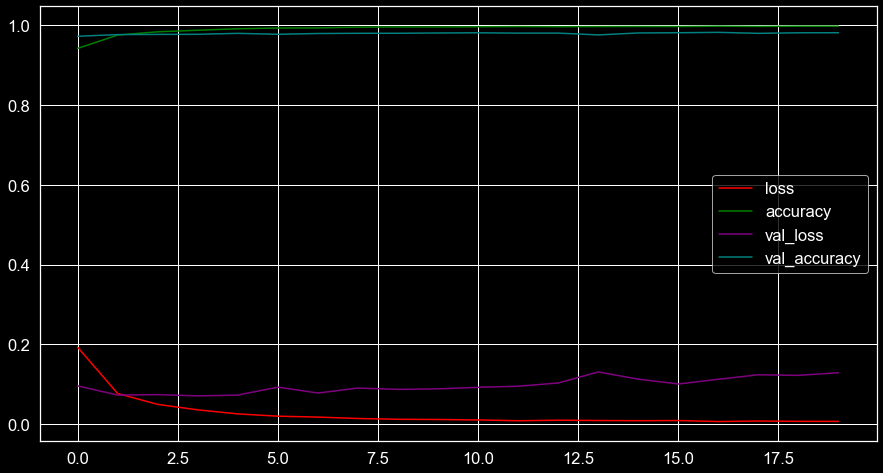

In [35]:
pd.DataFrame(hist).plot(color = ['red','green','purple','teal'])

In [36]:
print(datetime.now() - a)

0:01:19.892024
